Name: **Suleman Zack**<br>
Email: **sulemanzack@gmail.com**
## Introduction
Car insurance offers protection against accidents, theft, natural calamities & other unforeseen circumstances that could harm your vehicle. Having a good motor insurance policy ensures that you and your car are protected from the financial losses of these unfortunate events. Government has also made it compulsory to have vehicle insurance to drive cars on roads.
<center><img src="pic.jpg"  width="500" height = "150"></center>


## Problem Statement


A bank besides usual services also provides car insurance services. The bank has potential customers data and bank employees call them for advertising available car insurance options.You are provided with general information about clients (age,job,etc.) as well as more specific information about the current insurance sell campaign (communication,last contact day) and previous campaign (attributes like previous attempts,outcome etc).
You have data about 3100 customers who were contacted during the last campaign and for whom the results of the campaign (if the customer bought insurance or not) are known.

 

## Objective


The objective is to build a a machine learning model to predict if these customers will buy the car insurance or not

## Data
There are 19 variables (including the target variable) in the train dataset. Below are some of the listed variables and their description:

age: age of the customer

job_type: what job does customer do

marital_status: if the customer is married or not

education_level: education level of the customer

default_or_not: if the customer was able to repay in time or not


# Importation of Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
train_df=pd.read_csv('Train_data.csv')#,parse_dates=[['call_start', 'call_end']])
test_df=pd.read_csv('Test_data.csv')
train_df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


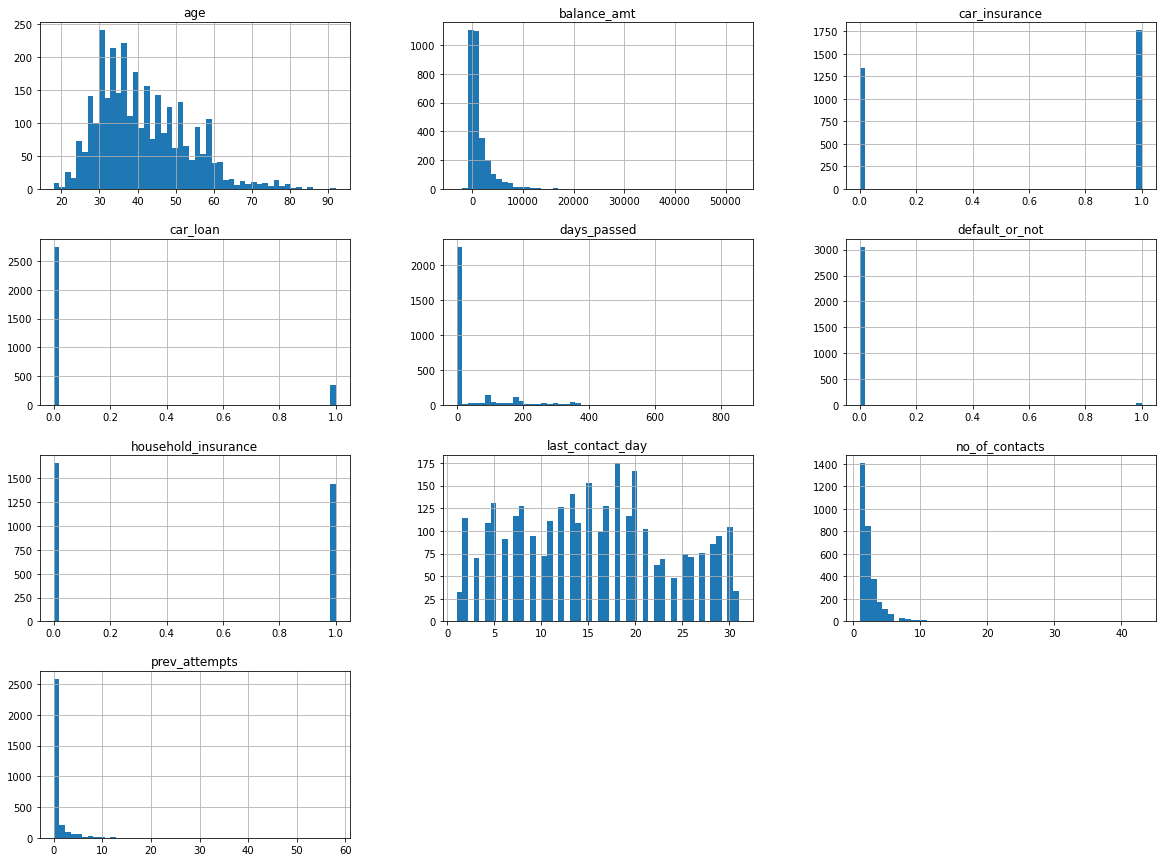

In [3]:
train_df.hist(bins=50,figsize=(20,15))
plt.show()

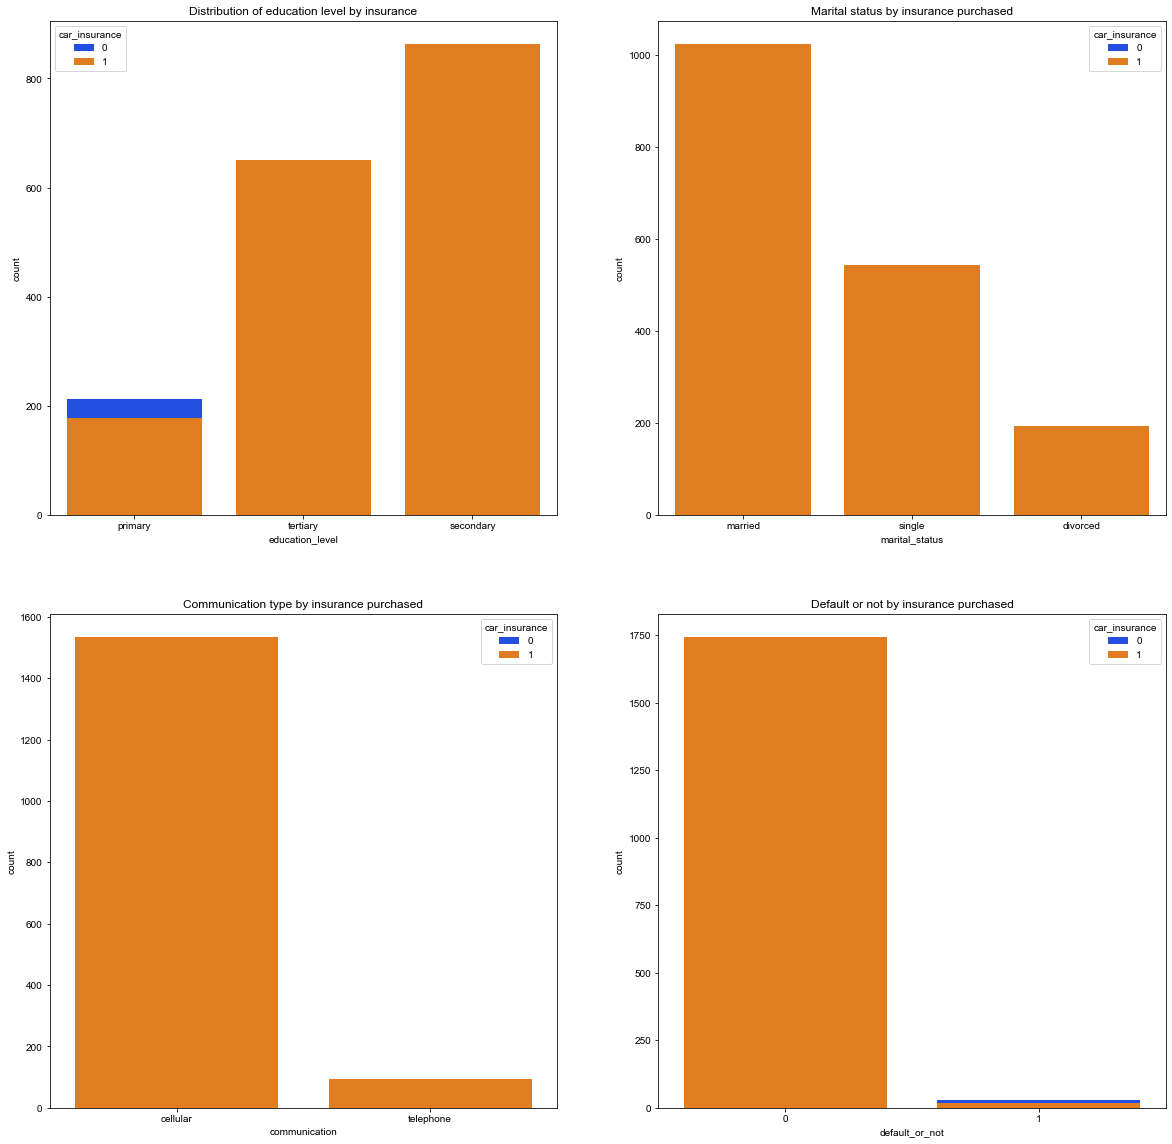

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.countplot(x='education_level',data=train_df, hue='car_insurance',palette=sns.color_palette("bright", 2),dodge=False,
              ax=ax[0][0]).set_title("Distribution of education level by insurance")
sns.countplot(x='marital_status', data=train_df, hue='car_insurance',palette=sns.color_palette("bright", 2),dodge=False,
              ax=ax[0][1]).set_title("Marital status by insurance purchased")
sns.countplot(x='communication', data=train_df,hue='car_insurance',palette=sns.color_palette("bright", 4),dodge=False,
              ax=ax[1][0]).set_title("Communication type by insurance purchased")

sns.countplot(x='default_or_not', data=train_df, hue='car_insurance',palette=sns.color_palette("bright", 2),dodge=False,
             ).set_title("Default or not by insurance purchased")#ax=ax[1][1]
sns.set(font_scale=2) 
plt.show()

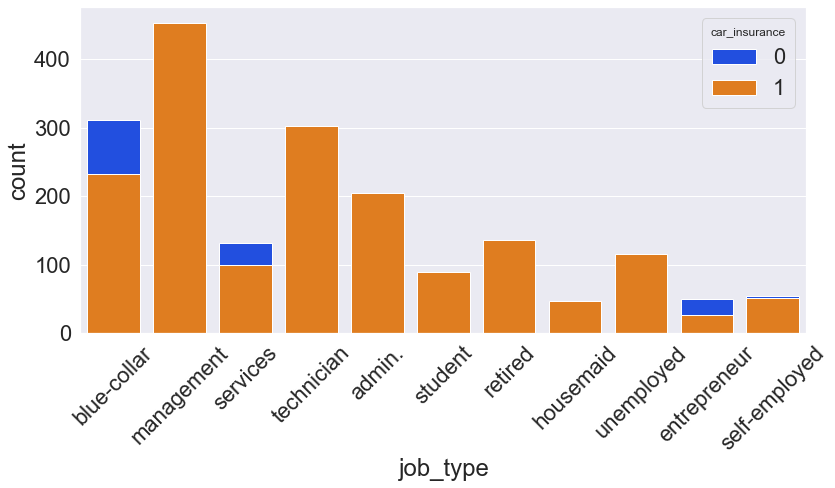

In [5]:
plt.figure(figsize=(13,6))
fig=sns.countplot(x='job_type',data=train_df, hue='car_insurance',palette=sns.color_palette("bright", 2),dodge=False)#.set_title("Distribution of Stcok by Gender")
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

# Feature Engineering

In [7]:
def cleaning(df):
    df['education']=df['education_level'].map({'primary':1,'secondary':3,'tertiary':3})
    df['default_or_not']=df['default_or_not'].map({'0':3,'1':0})
    df['call_duration']=abs((pd.to_datetime(df['call_end'])-pd.to_datetime(df['call_start'])).dt.total_seconds())
    df[['divorced','married','single']]=pd.get_dummies(df['marital_status'])
    df['days_passed']=abs(df['days_passed'])
    #return df
cleaning(train_df)


# Feature Selection

In [8]:
train_data=train_df[['car_insurance','age','education','default_or_not','car_loan','call_duration','prev_attempts',
           'last_contact_day','divorced','household_insurance','married', 'single', 'no_of_contacts', 'days_passed']]
train_data['education'].fillna(train_data['education'].mode()[0],inplace=True)

C:\Users\ZAQ\anaconda3_1\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Modelling

In [9]:
# Libraries
X=train_data.drop('car_insurance',axis=True)
y=train_data['car_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


## XGBOOST

In [10]:

xg_model = XGBClassifier(eval_metric = "logloss")
xg_model.fit(X_train, y_train)

C:\Users\ZAQ\anaconda3_1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [11]:
xg_pred = xg_model.predict(X_test)
print('XGBOOST Classification Report\n\n',classification_report(y_test,xg_pred))

XGBOOST Classification Report

               precision    recall  f1-score   support

           0       0.87      0.85      0.86       408
           1       0.88      0.90      0.89       523

    accuracy                           0.88       931
   macro avg       0.87      0.87      0.87       931
weighted avg       0.88      0.88      0.88       931



In [12]:
pd.DataFrame({'actual':y_test,'prediction':xg_pred}).head()

,actual,prediction
1387,1,1
443,0,0
2342,1,1
2073,1,1
1417,1,1


# Conclusion
* The algorithm applied in this project is the XGBOOST classifier
* Ocassional improvement would be conducted by working on the features used in the model